In [ ]:

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:

import sys

command_str = '{sys.executable} -m pip install --upgrade seaborn'.format(sys=sys)
print(command_str)
!{command_str}


----


# 2 Explanation of different measures

[Picture would be nice]

**Example 2.1.** Consider three countries, each with 100,000 people and an area of $100km^2$, and think about the population of each square kilometre grid square.

1.  *Averagia*  has  a  uniform  spread  of  population,  with  1,000  people  living  in  each  gridsquare.
2.  *Builtupia*  has  ten  towns,  each  of  10,000  people  living  in  a  single  square  kilometre, and the remaining land is uninhabited.
3.  *Citia* has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.


Heatmap on a 10x10 grid?


Perfect situation to use a dot density map
Dot distribution map
A dot distribution map, or dot density map, is a map type that uses a dot symbol to show the presence of a feature or a phenomenon. Dot maps rely on a visual scatter to show spatial pattern.


Yes, and randomize+jitter dot placement within the defined cells of the grid.


Not sure the name of it, I see it specific to world maps, population numbers, the idea is a 3D column off of the map area, get an idea of population per x, compared to the surrounding x’s.


Same thing here, map out your distro’s, place a column going up based on pop numbers vs surrounding green space.


Choropleth map with a color scale mapped linearly to population.


Would be all the same light color cells in the grid
Would have 10 moderate color cells and very light remaining cells
would have 1 very dark cell and very light remaining cells
You could imagine hovering over each part of the map and seeing the population estimate for that subset of the countries


## Heatmap on a 10x10 grid?

In [3]:

import numpy as np

total_pop = 100_000

# Averagia has a uniform spread of population, with 1,000 people living in each gridsquare.
averagia_people_count = 1_000
averagia_town_count = total_pop / averagia_people_count

# Builtupia has ten towns, each of 10,000 people living in a single square kilometre, and the remaining land is uninhabited.
builtupia_people_count = 10_000
builtupia_town_count = total_pop / builtupia_people_count

# Citia has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.
citia_people_count = 100_000
citia_town_count = total_pop / citia_people_count

gridsquare_count = total_pop / averagia_people_count
side_length = int(np.sqrt(gridsquare_count))

In [4]:

%run ../../load_magic/storage.py
s = Storage()
averagia_data = np.rot90(s.load_object('averagia_data'))
averagia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in averagia_data.flat]).reshape(averagia_data.shape)
builtupia_data = np.rot90(s.load_object('builtupia_data'))
builtupia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in builtupia_data.flat]).reshape(averagia_data.shape)
citia_data = np.rot90(s.load_object('citia_data'))
citia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in citia_data.flat]).reshape(averagia_data.shape)

In [5]:

def save_fig_as_various(fig, chart_name):
    for dir_name in ['pgf', 'png', 'svg']:
        dir_path = os.path.join(s.saves_folder, dir_name)
        os.makedirs(name=dir_path, exist_ok=True)
        file_path = os.path.join(dir_path, '{}.{}'.format(chart_name, dir_name))
        fig.savefig(file_path)

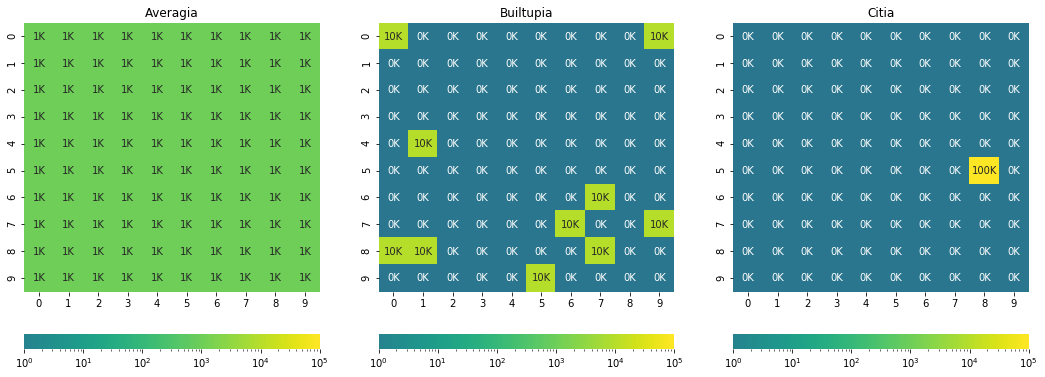

In [6]:

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import LogNorm
import copy

# Create six axes and accesses them through the returned array
fig = plt.figure(figsize=(18, 18/3))
row_count = 2
column_count = 3
grid_kws = {'height_ratios': (.9, .05), 'hspace': .3}
axes = fig.subplots(row_count, column_count, gridspec_kw=grid_kws)
tuple_list = [(averagia_data, averagia_annot_array, 'Averagia'),
              (builtupia_data, builtupia_annot_array, 'Builtupia'),
              (citia_data, citia_annot_array, 'Citia')]
row = 0
cbar_kws = {'orientation': 'horizontal'}
cmap = copy.copy(mpl.cm.get_cmap('viridis'))
cmap.set_bad(cmap(100)[:-1])
norm = LogNorm(vmin=1, vmax=total_pop, clip=False)
lw = 0.0
for col, data_tuple in enumerate(tuple_list):
    data = data_tuple[0]
    annot_array = data_tuple[1]
    title = data_tuple[2]
    ax = axes[row, col]
    cbar_ax = axes[row+1, col]
    ax = sns.heatmap(data, vmin=1, vmax=citia_people_count, center=builtupia_people_count, annot=annot_array,
                     fmt='s', linewidths=lw, ax=ax, cbar_ax=cbar_ax, cbar_kws=cbar_kws, cmap=cmap, norm=norm)
    Text_tuple = ax.set_title(title)

save_fig_as_various(fig, 'example_2_1_heat_map')